In [222]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from keras import preprocessing, layers
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


import matplotlib.pyplot as plt 
import seaborn as sns



In [179]:
def data_pre(fake,true):
    fake.insert(4,"fake(0)/true(1)",np.zeros(len(fake.date),dtype=int))
    true.insert(4,"fake(0)/true(1)",np.ones(len(true.date),dtype=int))
    
    months_f=[fake.date[i].split()[0] for i in range(len(fake.date))]
    fake.update(pd.DataFrame({"date":months_f}))
    months_t=[true.date[i].split()[0] for i in range(len(true.date))]
    true.update(pd.DataFrame({"date":months_t}))
    return pd.concat([fake,true],axis=0)
    

In [180]:
fake = pd.read_csv("C:/GitHub/fake_news/News_dataset/Fake.csv")
true = pd.read_csv("C:/GitHub/fake_news/News_dataset/True.csv")

data=data_pre(true,fake)
data


,title,text,subject,date,fake(0)/true(1)
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,December,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,December,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,December,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,December,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,December,0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,January,1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,January,1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,January,1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,January,1


In [184]:
data['date']

0        December
1        December
2        December
3        December
4        December
           ...   
23476     January
23477     January
23478     January
23479     January
23480     January
Name: date, Length: 44898, dtype: object

In [182]:
print("Unique date in table :", len(data["date"].unique()))


Unique date in table : 35


In [185]:
print("Unique date in table :", len(fake["date"].unique()))


Unique date in table : 35


In [73]:
fake.text.max()


'youngers these days are becoming so moist pic.twitter.com/ctKxUQXIAz  6Paths OfA WolfsPain (@GiovanniiDC) September 21, 2016THUGS BEATING UP A RANDOM WHITE GUY:Why are they attacking this random guy?#CharlotteProtest #Charlotte pic.twitter.com/Wt6q7o5iwc  Andrew Quackson (@AndrewQuackson) September 22, 2016 RIOTERS TRYING TO LIGHT A GUY ON FIRE: Peaceful Protesters  just trying to keep a man warm by attempting to light him on fire#CharlotteProtest #Charlotte pic.twitter.com/hWeVAadoi4  Andrew Quackson (@AndrewQuackson) September 22, 2016 RIOTERS BREAKING INTO A STORE:Protestors rush into souvenir store in #Charlotte #CharlotteRiots pic.twitter.com/r0KmeyTkTs  myrcat (@Myrna_Perez) September 22, 2016 RIOTERS PULLING PEOPLE FROM CARS:Agitators are now attempting to surround and pull people out of vehicles. #CharlotteRiot/#CharlotteProtest pic.twitter.com/V5ZokkRxlX  Audit The Media ?? (@AuditTheMedia) September 22, 2016 STEALING JUST BECAUSE Protesters getting even with an ATM for being

In [101]:
true.text.max()


'neVIENNA (Reuters) - The U.N. nuclear watchdog s chief urged major powers on Tuesday to clarify a part of their nuclear deal with Iran dealing with technology that could be used to develop an atom bomb, an area Russia said the agency should leave alone. The 2015 pact between six major powers and Iran restricts its nuclear activities in exchange for the lifting of sanctions against the Islamic Republic. Compliance with those curbs is being verified by the International Atomic Energy Agency. IAEA Director General Yukiya Amano has defended the deal as a major step forward while declining to comment specifically on criticism of it by the administration of U.S. President Donald Trump, who has called the accord - reached by predecessor Barack Obama -  an embarrassment to the United States . But while Nikki Haley, U.S. Ambassador to the United Nations, has infuriated Tehran by saying the IAEA should widen its inspections to include military sites, diplomats say Russia has been trying to rest

In [226]:
from sklearn.model_selection import train_test_split

x=data.drop("fake(0)/true(1)",axis=1)
y=data['fake(0)/true(1)']

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=62,test_size=0.2)


In [189]:
fake_token = preprocessing.text.text_to_word_sequence(fake.text.max())
len(fake_token)


163

In [110]:
true_token = preprocessing.text.text_to_word_sequence(true.title.max())
len(true_token)


9

In [191]:
Xtrain_text_transform = layers.TextVectorization(max_tokens=500,
                                               output_mode='int',
                                               output_sequence_length=500)

Xtrain_text_transform.adapt(X_train["text"])

Xtrain_vector_text = Xtrain_text_transform(X_train["text"]).numpy()


In [192]:
Xtest_text_transform = layers.TextVectorization(max_tokens=600,
                                               output_mode='int',
                                               output_sequence_length=600)
Xtest_text_transform.adapt(X_test["text"])
Xtest_vector_text = Xtest_text_transform(X_test["text"]).numpy()


In [193]:
Xtrain_title_transform = layers.TextVectorization(max_tokens=600,
                                                output_mode='int',
                                                output_sequence_length=600)
Xtrain_title_transform.adapt(X_train["title"])
Xtrain_vector_title = Xtrain_title_transform(X_train["title"]).numpy()


In [194]:
Xtest_title_transform = layers.TextVectorization(max_tokens=600,
                                                output_mode='int',
                                                output_sequence_length=600)
Xtest_title_transform.adapt(X_test["title"])
Xtest_vector_title = Xtest_title_transform(X_test["title"]).numpy()


In [203]:


cat_transform = pipeline.Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("one_hot_encoder", OneHotEncoder()),
        
    ]
)


In [204]:
columns_text = ["text", 'title']
cat_column = ["date", 'subject']


In [205]:
preprocessor = ColumnTransformer(
    [
        
        ("cat_transform", cat_transform, cat_column)
    ]
)


In [227]:
preprocessor.fit(X_test)
preprocessor.fit(X_train)

KeyError: ('date', 'subject')

In [209]:
x_train=preprocessor.fit_transform(X_train)
x_test=preprocessor.fit_transform(X_test)


In [241]:
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [250]:
X_train

,title,text,subject,date
11261,BEAUTIFUL MELANIA WEARS LBD TO HOST Reception ...,Trump commented about it during the reception:...,politics,Mar
21026,Two Russian soldiers killed by shelling in Syr...,MOSCOW (Reuters) - Two Russian servicemen have...,worldnews,September
6672,Michael Jordan Condemns North Carolina Anti-L...,North Carolina Republicans just got slam-dunke...,News,April
14513,BLUNT MEME EXPOSES Difference Between Forced G...,2 Corinthians 9:7 Each one must give as he ha...,politics,Feb
11652,China jails 44 Taiwanese for fraud in case den...,BEIJING/TAIPEI (Reuters) - A Beijing court on ...,worldnews,December
...,...,...,...,...
2163,Key in NAFTA talks is 'not tearing apart what ...,WASHINGTON (Reuters) - Mexico’s Economy Minist...,politicsNews,August
19424,LIBERAL LOSER Screams “This is my America!” Af...,,left-news,Dec
9809,"Driven up the wall by Trump, Mexico looks to r...","MEXICO CITY (Reuters) - At first, Mexico’s gov...",politicsNews,April
15384,Judge orders Rosneft CEO Sechin to appear as w...,MOSCOW (Reuters) - A Russian judge on Wednesda...,worldnews,November


In [232]:
y_train

11261    1
21026    0
6672     1
14513    1
11652    0
        ..
2163     0
19424    1
9809     0
15384    0
9746     0
Name: fake(0)/true(1), Length: 35918, dtype: int32

In [252]:
model_mul=pipeline.make_pipeline(  CountVectorizer(), naive_bayes.MultinomialNB(alpha=1.0,fit_prior=False))#metrics.confusion_matrix( df_test.Label,pre ))

model_mul.fit(X_train.text, y_train)



Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB(fit_prior=False))])

In [253]:
model_gussion=pipeline.make_pipeline(  CountVectorizer(), naive_bayes.GaussianNB() )#metrics.confusion_matrix( df_test.Label,pre ))

model_gussion.fit(X_train.text, y_train)



In [ ]:
print(model_mul.score(X_test.text,y_test))
model_gussion.score(X_test.text,y_test)

0.9344097995545657

In [237]:
pre=model.predict(X_test.text)
len(pre)


8980

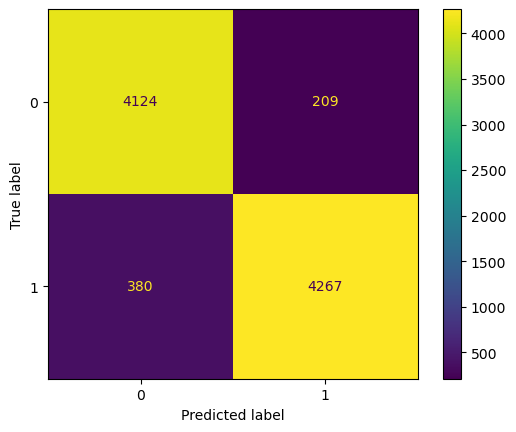

In [242]:
metrics.ConfusionMatrixDisplay.from_predictions( y_test,pre)

In [247]:
text=[["BRAKING NEWS Sharukh khan was died so be ready for big terror attacks "]]
#['B.E/B.Tech: Dear DATE PRATIK SANTOSH, You have given your Status as Freeze on 04 Dec 2021 03: 52 PM. CET Cell ','Alert - 795301 is your mobile one time password(OTP) for verifiction - SPPU ','Dear Customer, You have a missed call from +911408520055 The last missed call was at 05:57 PM on 09-Feb-2022 Thankyou, Team Jio. ',' Dear Customer, 368565 is your one time password (OTP). Please enter the OTP to proceed.Thank you,Team Jio ','Dear Customer, 453032 is your one time password (OTP). Please enter the OTP to proceed.Thank you,Team Jio   ','Rofl. Its true to its name ','Paytm secure SMS for Verifying your mobile number:OTM5Zjc0YmVjMDZlODdlOWU4MjcwNWE4Njk2NzlmMzA= ', 'Hi! Please save the Internet settings sent to you & enjoy Vi High Speed GIGAnet. Your code is 1234. Click bit.ly/ViApp21 for Data offers',  'Hi! Please save the Internet settings sent to you & enjoy Vi High Speed GIGAnet. Your code is 1234. Click bit.ly/ViApp21 for Data offers','You have successfully linked your bank account 6XXXXXXXX57 with your BHIM UPI profile using Paytm App:PPBL'  ]
#['i haveplan for long trip',' Paytm secure SMS for Verifying your mobile number:OTM5Zjc0YmVjMDZlODdlOWU4MjcwNWE4Njk2NzlmMzA= '    ,' 427395 is the verification code to log in to your Flipkart account. DO NOT share this code with anyone including delivery agents. @www.flipkart.com #427395  ','Instant digital savings bank account for you!Open a Kotak 811 zero balance account in 5 minutes : https://kotk.in/9b6AMIT&C Apply -Kbank ',' B.E/B.Tech: Dear DATE PRATIK SANTOSH, You have given your Status as Freeze on 04 Dec 2021 03: 52 PM. CET Cell'],
#[  ' Dear Customer, You have a missed call from +919422490218 The last missed call was at 03:37 PM on 29-Aug-2022 Thankyou, Team Jio. ']
  


pre=model.predict(text[0])
pre

array([1])